# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | kottapalli
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | oroville east
Processing Record 10 of Set 1 | brisas de zicatela
Processing Record 11 of Set 1 | rundu
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | nchelenge
Processing Record 16 of Set 1 | bag
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | loango
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | knysna
Processing Record 22 of Set 1 | 

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,270.51,68,76,4.47,SJ,1746421489
1,longyearbyen,78.2186,15.6401,265.06,79,20,5.14,SJ,1746421471
2,enewetak,11.3474,162.3373,300.89,71,18,8.20,MH,1746421492
3,klyuchi,52.2667,79.1667,289.02,38,14,8.44,RU,1746421493
4,kottapalli,18.4833,79.1000,311.06,19,0,2.69,IN,1746421494


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv(r'C:\Users\rache\python-api-challenge\cities.csv', index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv(r'C:\Users\rache\python-api-challenge\cities.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,270.51,68,76,4.47,SJ,1746421489
1,longyearbyen,78.2186,15.6401,265.06,79,20,5.14,SJ,1746421471
2,enewetak,11.3474,162.3373,300.89,71,18,8.20,MH,1746421492
3,klyuchi,52.2667,79.1667,289.02,38,14,8.44,RU,1746421493
4,kottapalli,18.4833,79.1000,311.06,19,0,2.69,IN,1746421494


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

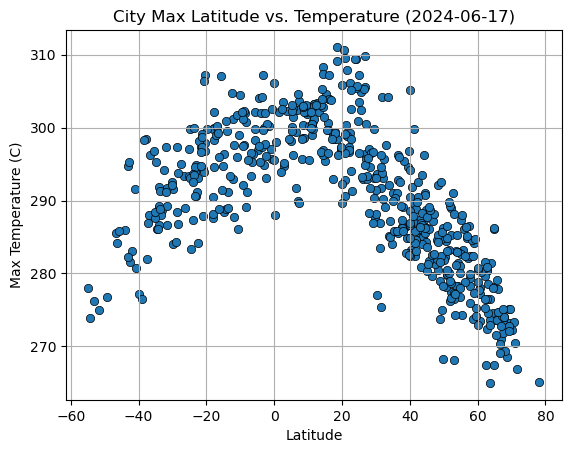

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\rache\python-api-challenge\Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

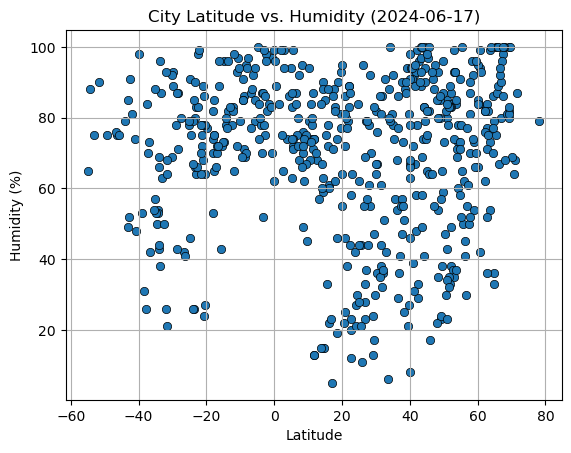

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\rache\python-api-challenge\Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

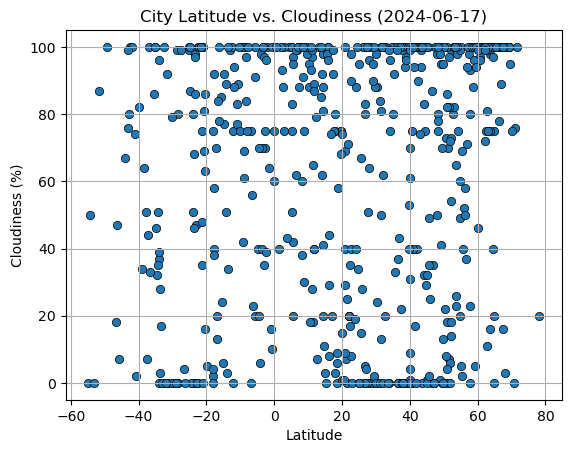

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\rache\python-api-challenge\Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

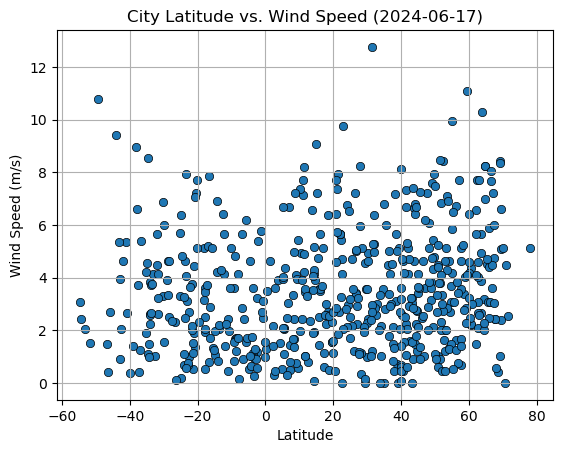

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\rache\python-api-challenge\Fig4.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
#Function to create linear regression scatter plot with trendline and equation
def plot_linear_regression(x, y, title, xlabel, ylabel, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x, y, edgecolor='black')
    plt.plot(x, regress_values, "r")
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(f"output_data/{filename}")
    plt.show()

In [ ]:
#Create DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,270.51,68,76,4.47,SJ,1746421489
1,longyearbyen,78.2186,15.6401,265.06,79,20,5.14,SJ,1746421471
2,enewetak,11.3474,162.3373,300.89,71,18,8.20,MH,1746421492
3,klyuchi,52.2667,79.1667,289.02,38,14,8.44,RU,1746421493
4,kottapalli,18.4833,79.1000,311.06,19,0,2.69,IN,1746421494


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,276.71,75,100,10.78,TF,1746421495
9,rundu,-17.9333,19.7667,287.65,70,2,2.52,NaN,1746421223
10,west island,-12.1568,96.8225,301.14,83,75,5.66,CC,1746421501
13,nchelenge,-9.3451,28.7340,292.17,91,100,3.62,ZM,1746421504
15,ushuaia,-54.8000,-68.3000,277.96,65,0,3.09,AR,1746421277


###  Temperature vs. Latitude Linear Regression Plot

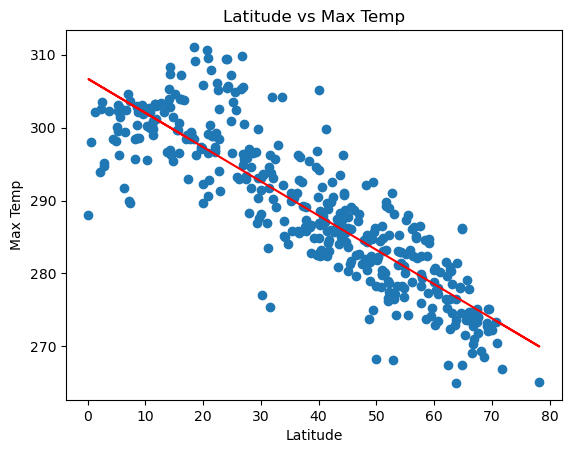

r² = 0.75


In [92]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print(f"r² = {r**2:.2f}")

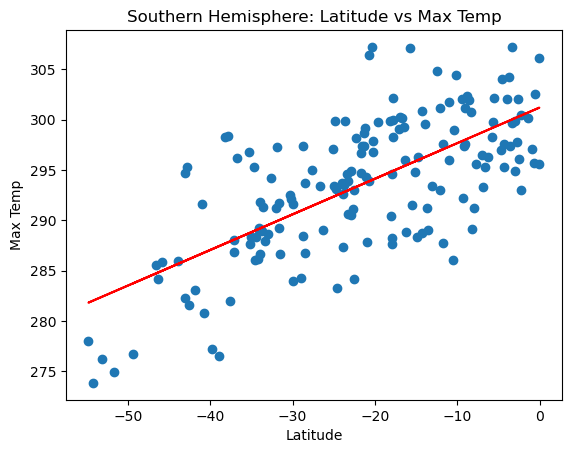

r² = 0.47


In [96]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Southern Hemisphere: Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print(f"r² = {r**2:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

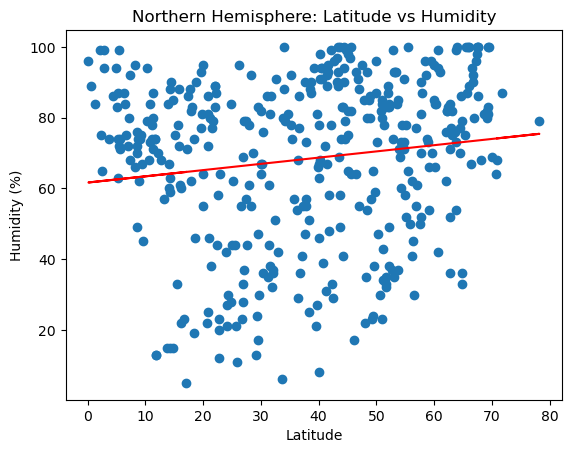

r² = 0.02


In [97]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

print(f"r² = {r**2:.2f}")

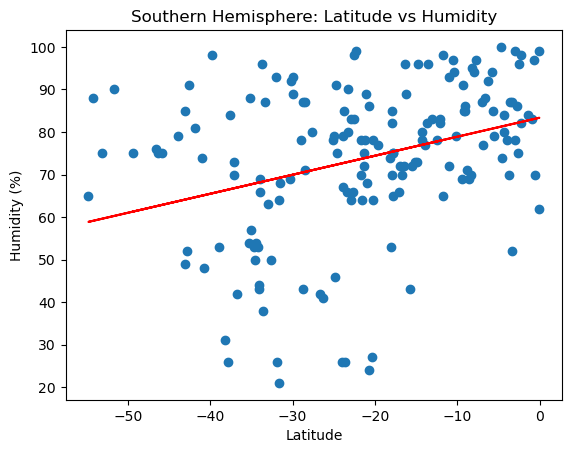

r² = 0.11


In [98]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

print(f"r² = {r**2:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

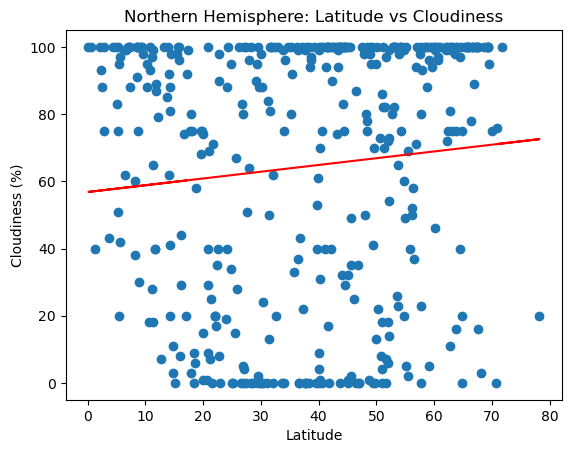

r² = 0.01


In [99]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

print(f"r² = {r**2:.2f}")

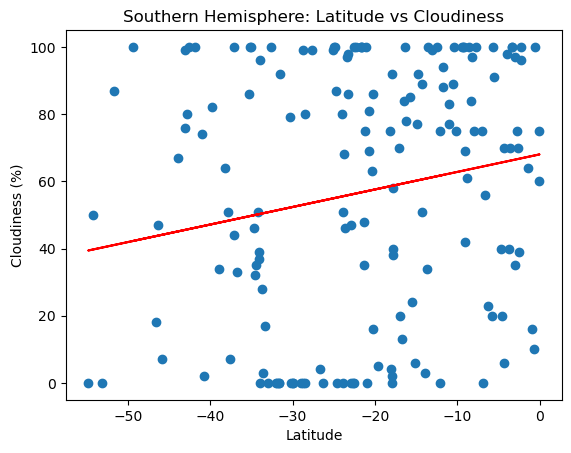

r² = 0.03


In [100]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

print(f"r² = {r**2:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

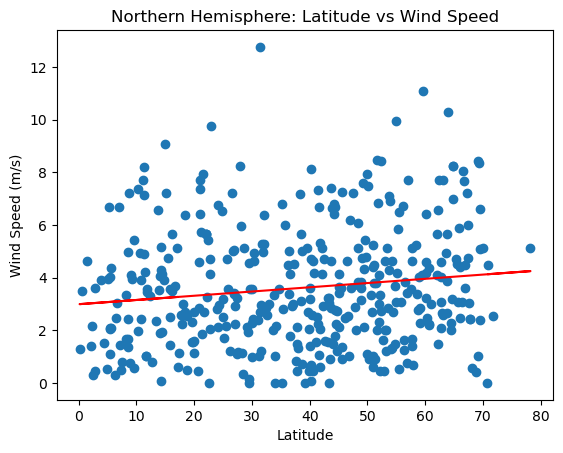

r² = 0.02


In [101]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

print(f"r² = {r**2:.2f}")

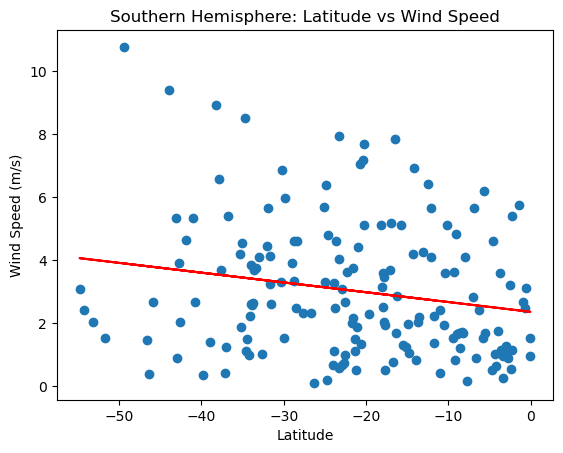

r² = 0.04


In [102]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

slope, intercept, r, _, _ = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color="red")
plt.title("Southern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

print(f"r² = {r**2:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE